# EDA
## OCD

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

- json to dataframe
  * 참고자료 : ankltal 

In [3]:
chunks = pd.read_json('train.jsonl', lines=True, chunksize=100000)

In [4]:
train = pd.DataFrame()

In [5]:
for i, chunk in enumerate(chunks):
    event_dict = {
        'session': [],
        'aid':     [],
        'ts':      [],
        'type':    []
    }

    if i >= 2:
        break
    for session, events in zip(chunk['session'].tolist(), \
                               chunk['events'].tolist()):
        for event in events:
            event_dict['session'].append(session)
            event_dict['aid'].append(event['aid'])
            event_dict['ts'].append(event['ts'])
            event_dict['type'].append(event['type'])
    chunk_session = pd.DataFrame(event_dict)
    train = pd.concat([train, chunk_session])

In [6]:
train

,session,aid,ts,type
0,0,1517085,1659304800025,clicks
1,0,1563459,1659304904511,clicks
2,0,1309446,1659367439426,clicks
3,0,16246,1659367719997,clicks
4,0,1781822,1659367871344,clicks
...,...,...,...,...
5057903,199999,928064,1659336408967,clicks
5057904,199999,849970,1659336449078,clicks
5057905,199999,1052480,1659336547035,clicks
5057906,199999,487255,1659336561116,clicks


In [7]:
train['ts'] = pd.to_datetime(train['ts'], unit='ms')
display(train)

,session,aid,ts,type
0,0,1517085,2022-07-31 22:00:00.025,clicks
1,0,1563459,2022-07-31 22:01:44.511,clicks
2,0,1309446,2022-08-01 15:23:59.426,clicks
3,0,16246,2022-08-01 15:28:39.997,clicks
4,0,1781822,2022-08-01 15:31:11.344,clicks
...,...,...,...,...
5057903,199999,928064,2022-08-01 06:46:48.967,clicks
5057904,199999,849970,2022-08-01 06:47:29.078,clicks
5057905,199999,1052480,2022-08-01 06:49:07.035,clicks
5057906,199999,487255,2022-08-01 06:49:21.116,clicks


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285561 entries, 0 to 10285560
Data columns (total 4 columns):
 #   Column   Dtype         
---  ------   -----         
 0   session  int64         
 1   aid      int64         
 2   ts       datetime64[ns]
 3   type     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 313.9+ MB


In [48]:
train.isna().sum()

session    0
aid        0
ts         0
type       0
dtype: int64

In [7]:
min(train['ts']) #train : 7월 31일 ~ 8월 28일까지의 데이터

Timestamp('2022-07-31 22:00:00.025000')

In [8]:
max(train['ts'])

Timestamp('2022-08-28 21:59:59.941000')

In [13]:
train['type'].unique()

array(['clicks', 'carts', 'orders'], dtype=object)

In [14]:
train['type'].value_counts()

clicks    9320528
carts      751785
orders     213248
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

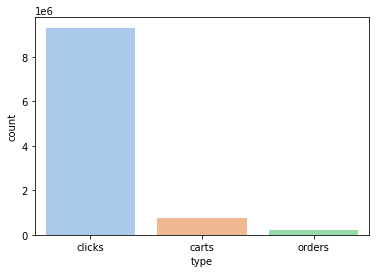

In [73]:
sns.countplot(data = train, x = 'type', palette = "pastel")

In [15]:
train.mode()
#7905 session이 가장 활동을 많이 함
#29735가 가장 많이 view되었음
#8월 3일 12:50에 활동이 가장 많이 일어남
#(click, cart, order) 중 click이 제일 많이 됨

,session,aid,ts,type
0,7905.0,29735.0,2022-08-03 12:50:09.493,clicks
1,NaN,NaN,2022-08-04 21:11:17.687,NaN


In [81]:
count_session = train['ts'].groupby(train['session']).count() #session별 활동량
count_session.head()

session
0    276
1     32
2     33
3    226
4     19
Name: ts, dtype: int64

In [58]:
count_session.describe() #최소 2번, 최대 495번 활동

count    200000.000000
mean         51.427805
std          75.456583
min           2.000000
25%           6.000000
50%          19.000000
75%          62.000000
max         495.000000
Name: ts, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


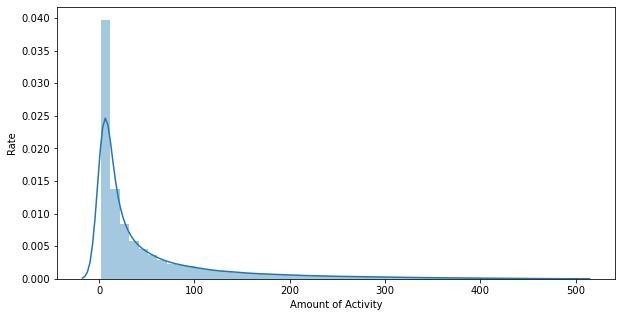

In [71]:
plt.figure(figsize = (10, 5)) #활동량 분포
dis_plot = sns.distplot(count_session)
dis_plot.set_xlabel("Amount of Activity")
dis_plot.set_ylabel("Rate")
plt.show()

In [8]:
count_event = train.groupby(['session', 'aid', 'type']).count()
count_event.loc[0]

ts
session aid   type      
0       6851  clicks   1
        7563  clicks   2
        10268 clicks   1
        16246 clicks   1
        30373 clicks   1

In [ ]:
cart_click =[]

for item in products:
    if item in cart:
        if item in click:        
            cart_click.append("true")
        else:
            cart_click.append("false")

In [ ]:
cart_click

In [103]:
# cart = list(session_df[session_df['type']=='carts']['aid']) #cart에 담은 product들 관련 활동만 분석
# for item in cart:
#     print("<",item,">")
#     print(count_event.loc[(0, item)])
#     print("=======================================")

< 1391196 >
        ts
type      
carts    2
clicks  10
< 1391196 >
        ts
type      
carts    2
clicks  10
< 636064 >
        ts
type      
carts    1
clicks  11
< 1126830 >
        ts
type      
carts    2
clicks   4
< 1126830 >
        ts
type      
carts    2
clicks   4
< 984459 >
        ts
type      
carts    1
clicks   8
< 1100210 >
        ts
type      
carts    4
clicks   7
< 1100210 >
        ts
type      
carts    4
clicks   7
< 1100210 >
        ts
type      
carts    4
clicks   7
< 1100210 >
        ts
type      
carts    4
clicks   7
< 801832 >
        ts
type      
carts    1
clicks   4
< 619168 >
        ts
type      
carts    1
clicks   5
< 1174415 >
        ts
type      
carts    1
clicks   4
< 799272 >
        ts
type      
carts    1
clicks   3
< 638647 >
        ts
type      
carts    1
clicks   9
< 1754283 >
        ts
type      
carts    1
clicks   5
< 24159 >
        ts
type      
carts    1
clicks   9
< 598537 >
        ts
type      
carts    1
clicks   4
<

In [116]:
train[train['aid']==1100210]

,session,aid,ts,type
20587,215,1100210,2022-08-28 20:09:24.463,clicks
63194,783,1100210,2022-08-06 12:24:02.304,clicks
63216,783,1100210,2022-08-06 14:35:26.009,clicks
70461,876,1100210,2022-08-12 16:35:40.180,clicks
70492,876,1100210,2022-08-19 18:28:10.118,clicks
...,...,...,...,...
10196399,198058,1100210,2022-08-20 19:32:40.190,carts
10196407,198058,1100210,2022-08-20 19:40:45.439,orders
10196412,198058,1100210,2022-08-20 20:33:10.720,clicks
10216264,198456,1100210,2022-08-05 20:40:19.853,clicks


In [118]:
products

,session,aid,ts,type


In [65]:
# for product in products:
#     product_df = train[train['aid'] == product]
#     product_df = product_df.sort_values(by='ts')
    
#     fig, ax = plt.subplots(figsize=(15, 5))
#     ax.set_title("product : " + str(product))
#     sns.scatterplot(x='ts', y='type', data=product_df, hue='type', ax= ax)
#     plt.show()

In [84]:
count_event = train.groupby(['session', 'aid', 'type']).count() #session별 특정 상품에 대한 event 수
count_event.head(10)

ts
session aid    type      
0       6851   clicks   1
        7563   clicks   2
        10268  clicks   1
        16246  clicks   1
        30373  clicks   1
        72748  clicks   1
        76358  clicks   1
        97836  clicks   1
        102416 clicks   2
        138431 clicks   1

In [85]:
cart_all = count_event.loc[:,:,'carts'] #session별 cart에 넣은 상품 및 구매 빈도
cart_all

ts
session aid        
0       275288    1
        280978    1
        315914    1
        442293    1
        461689    1
...              ..
199997  1502122   1
        1566360   3
        1705780   1
        1806653   1
        1828148   1

[613692 rows x 1 columns]

In [89]:
cart_all.index = cart_all.index.droplevel(0) #상품별 cart에 넣은 횟수
cart_all['aid'] = cart_all.index
cart_count = cart_all.groupby(cart_all['aid']).count()
cart_count

,ts
aid,
3,1
4,1
11,1
23,1
32,1
...,...
1855584,4
1855591,1
1855594,10


In [90]:
cart_count.describe()

,ts
count,257631.000000
mean,2.382058
std,5.633746
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,570.000000


In [91]:
cart_count[cart_count['ts']==570] #가장 많이 cart에 담은 상품의 id

,ts
aid,
80222,570


In [92]:
cart_count = cart_count.sort_values(by = 'ts', ascending=False) #가장 많이 산 상품 top 20
cart_top_20 = cart_count.head(20)
cart_top_20

,ts
aid,
80222,570
166037,432
1733943,401
29735,373
832192,333
1022566,331
1603001,313
1083665,295
1629608,294


<AxesSubplot:xlabel='aid', ylabel='ts'>

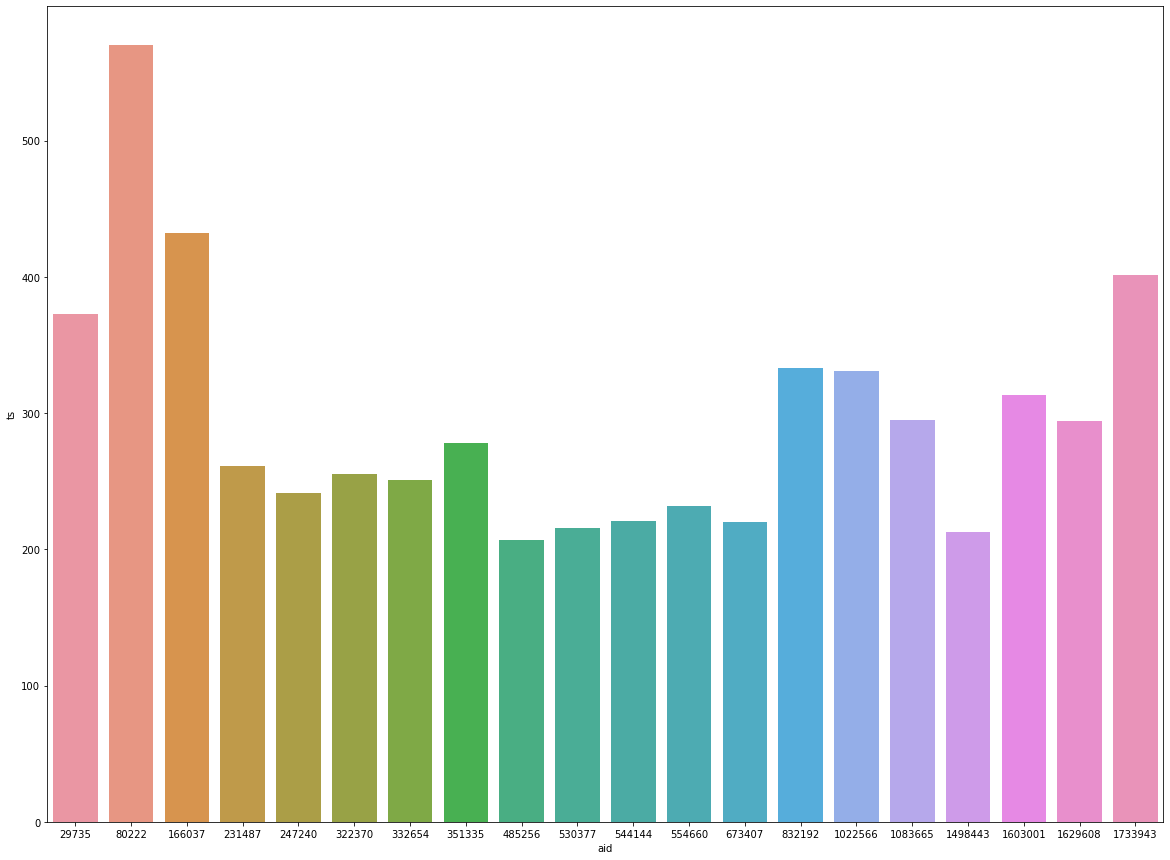

In [93]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(data = cart_top_20, x = cart_top_20.index, y = 'ts')

In [87]:
order_all = count_event.loc[:,:,'orders'] #session별 order한 상품 및 구매 빈도
order_all

ts
session aid        
0       305831    1
        461689    1
        543308    1
        1199474   1
3       54857     1
...              ..
199997  104892    1
        598138    1
        1423310   1
        1426451   2
        1700659   2

[194087 rows x 1 columns]

In [88]:
order_all.index = order_all.index.droplevel(0) #상품별 order횟수
order_all['aid'] = order_all.index
order_count = order_all.groupby(order_all['aid']).count()
order_count

,ts
aid,
35,1
51,1
90,1
128,1
133,2
...,...
1855567,1
1855572,1
1855576,1


In [63]:
order_count.describe()

,ts
count,103750.000000
mean,1.870718
std,3.325094
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,308.000000


In [64]:
order_count[order_count['ts']==308] #가장 많이 산 상품의 id

,ts
aid,
80222,308


In [77]:
order_count = order_count.sort_values(by = 'ts', ascending=False) #가장 많이 산 상품 top 20
order_top_20 = order_count.head(20)
order_top_20

,ts
aid,
80222,308
351335,165
166037,154
1629608,144
1603001,143
1022566,135
1733943,131
231487,121
332654,115


In [96]:
cart_top_20_id = list(cart_top_20.index)
order_top_20_id = list(order_top_20.index)
intersection = set(cart_top_20_id)&set(order_top_20_id)
print(intersection) #총 20개 중에 12개 상품 일치 (60%의 일치율)

{1022566, 29735, 1629608, 247240, 351335, 332654, 1083665, 166037, 1733943, 1603001, 80222, 231487}


In [35]:
order_all_index = list(order_all.index)
order_all_id=[]
for session, pid in order_all_index:
    order_all_id.append(pid)

[305831,
 461689,
 543308,
 1199474,
 54857,
 357461,
 1018433,
 1343406,
 1425967,
 298827,
 987969,
 1145803,
 832890,
 618376,
 887719,
 1670763,
 1689065,
 1742191,
 1757034,
 125127,
 275825,
 284816,
 326526,
 571631,
 588838,
 772148,
 796017,
 816119,
 1051675,
 1054943,
 1077924,
 1566388,
 1664305,
 1815907,
 791627,
 1143723,
 1393473,
 165455,
 228850,
 383546,
 719255,
 1006109,
 1213426,
 1823466,
 806996,
 1415436,
 1534972,
 51179,
 1708372,
 1758952,
 667232,
 1112725,
 907278,
 573705,
 1104781,
 1148596,
 1162085,
 1182605,
 1404100,
 166037,
 205516,
 726640,
 832382,
 915392,
 1082079,
 1240180,
 1500844,
 282621,
 409620,
 509070,
 565802,
 576646,
 934266,
 1018338,
 1097946,
 1384883,
 1438538,
 1470083,
 1639625,
 1660020,
 1839606,
 1341,
 90173,
 143617,
 235666,
 545295,
 695183,
 701694,
 1086435,
 1679916,
 223422,
 260934,
 483149,
 987525,
 636101,
 639869,
 1041839,
 399315,
 453736,
 1308823,
 1802490,
 147641,
 365522,
 519672,
 709156,
 801774,
 9300

In [31]:
click = count_event.loc[0,:,'clicks']
click_id = list(click.index)
click.head()

,ts
aid,
6851,1
7563,2
10268,1
16246,1
30373,1


In [ ]:
for id in cart_id:
    if id in click_id:
        print("true")
    

In [23]:
order = count_event.loc[0,:,'orders']
order

,ts
aid,
305831,1
461689,1
543308,1
1199474,1


- session : 0을 sample로 활동 분석

In [97]:
count_event.loc[0]

,,ts
aid,type,
6851,clicks,1
7563,clicks,2
10268,clicks,1
16246,clicks,1
30373,clicks,1
...,...,...
1816325,clicks,1
1818905,clicks,1
1840418,clicks,1


In [98]:
click = count_event.loc[0,:,'clicks']
click_id = list(click.index)
click.head()

,ts
aid,
6851,1
7563,2
10268,1
16246,1
30373,1


In [101]:
cart = count_event.loc[0,:,'carts']
cart_id = list(cart.index)
cart

,ts
aid,
275288,1
280978,1
315914,1
442293,1
461689,1
543308,2
789245,1
974651,4
1199474,1


In [107]:
diff = set(cart_id)-set(click_id)
print(diff) #click하지 않고 cart에 넣은 상품이 있음

#꼭 click하지 않아도 cart에 담기 가능
#
#따라서, 특정 상품을 cart에 담아야 order가 가능하다고 할 수 없음

{280978}


In [103]:
order = count_event.loc[0,:,'orders']
order_id = list(order.index)
order

,ts
aid,
305831,1
461689,1
543308,1
1199474,1


In [106]:
diff = set(order_id)-set(cart_id)
print(diff) #cart에 담지 않고 주문한 상품이 있음

#꼭 cart에 안 담아도 다른 경로로 주문 가능 OR 데이터 수집 기간 전에 cart에 담아놓았을 수 있음
#따라서, 특정 상품을 cart에 담아야 order가 가능하다고 할 수 없음

{305831}


In [15]:
session_df = train[train['session']==0]
session_df = session_df.sort_values(by='ts')
session_df.head()

,session,aid,ts,type
0,0,1517085,2022-07-31 22:00:00.025,clicks
1,0,1563459,2022-07-31 22:01:44.511,clicks
2,0,1309446,2022-08-01 15:23:59.426,clicks
3,0,16246,2022-08-01 15:28:39.997,clicks
4,0,1781822,2022-08-01 15:31:11.344,clicks


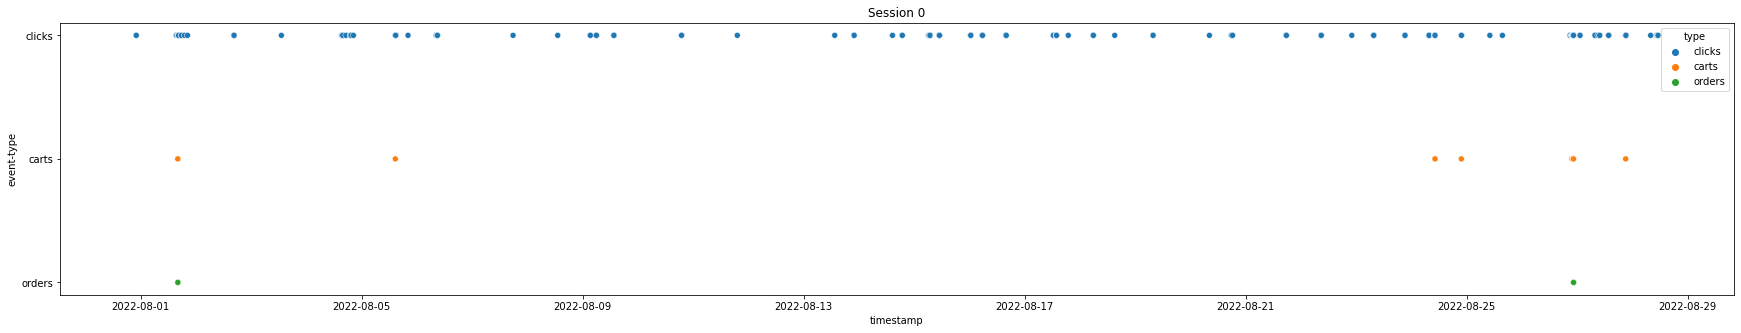

In [83]:
fig, ax = plt.subplots(figsize=(30, 5))
ax.set_xlabel('timestamp')
ax.set_ylabel('event-type')
ax.set_title('Session 0')
sns.scatterplot(x = 'ts', y = 'type', hue = 'type', data = session_df, ax = ax)
plt.show()

In [16]:
cart = list(session_df[session_df['type']=='carts']['aid']) #cart에 담은 product들 관련 활동만 분석
session_df_carts = session_df[session_df['aid'].isin(cart)]
session_df_carts = session_df_carts.sort_values('ts')
session_df_carts

,session,aid,ts,type
6,0,1649869,2022-08-01 16:04:53.840,carts
7,0,461689,2022-08-01 16:04:58.050,carts
9,0,461689,2022-08-01 16:07:07.105,orders
11,0,1649869,2022-08-01 16:07:47.686,clicks
12,0,1649869,2022-08-01 16:23:23.682,clicks
14,0,1649869,2022-08-01 16:24:02.297,clicks
20,0,461689,2022-08-01 19:00:37.483,clicks
42,0,789245,2022-08-05 14:35:46.448,clicks
43,0,789245,2022-08-05 14:35:57.188,carts
48,0,789245,2022-08-05 14:41:46.088,clicks


<AxesSubplot:title={'center':'Session 0'}, xlabel='ts', ylabel='type'>

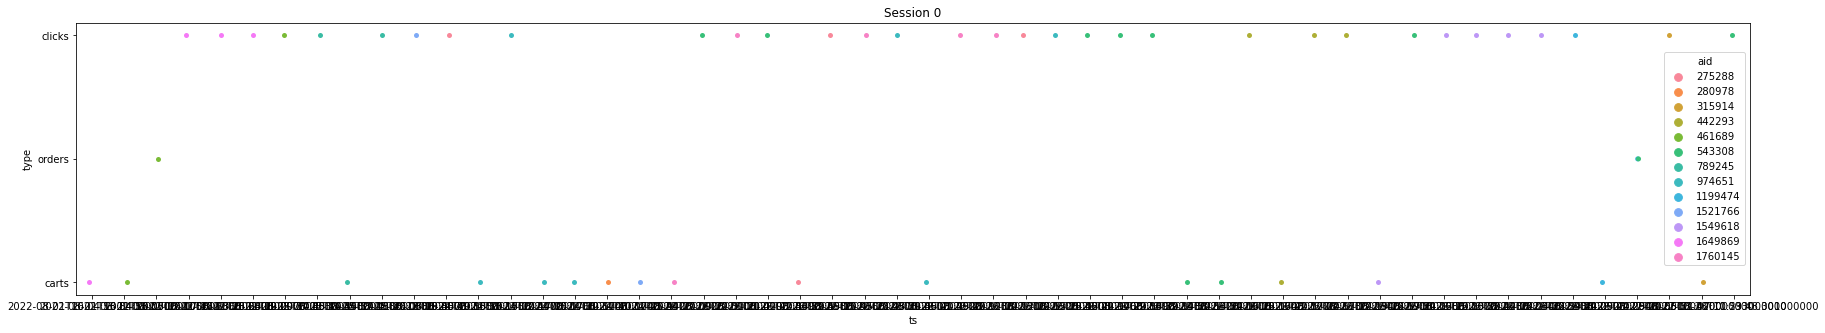

In [18]:
fig, ax = plt.subplots(figsize=(30, 5))
ax.set_xlabel('timestamp')
ax.set_ylabel('event_type')
ax.set_title('Session 0')
sns.stripplot(x='ts', y='type', hue = 'aid', data = session_df_carts, ax = ax)

- 시간대와 이벤트 유형 간 관계

In [9]:
temp_train = train[['ts', 'type']]
temp_train['hour'] = temp_train['ts'].dt.hour
temp_train

C:\Users\User\AppData\Local\Temp\ipykernel_11156\1967793771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_train['hour'] = temp_train['ts'].dt.hour


,ts,type,hour
0,2022-07-31 22:00:00.025,clicks,22
1,2022-07-31 22:01:44.511,clicks,22
2,2022-08-01 15:23:59.426,clicks,15
3,2022-08-01 15:28:39.997,clicks,15
4,2022-08-01 15:31:11.344,clicks,15
...,...,...,...
5057903,2022-08-01 06:46:48.967,clicks,6
5057904,2022-08-01 06:47:29.078,clicks,6
5057905,2022-08-01 06:49:07.035,clicks,6
5057906,2022-08-01 06:49:21.116,clicks,6


In [10]:
hour_type = temp_train.pivot_table(index='hour', columns='type', aggfunc=len, fill_value=0)
hour_type

ts               
type  carts  clicks orders
hour                      
0     13518  188887   2679
1      9133  129942   1872
2      8821  125066   1781
3     12776  176001   3079
4     24808  307162   6578
5     39987  471027  11474
6     44553  516779  13759
7     34640  390972  11014
8     32688  378637  10229
9     32629  376174  10205
10    33775  394988  10322
11    35105  409525  10461
12    34529  408623  10587
13    34462  415533  10299
14    35046  422350  10108
15    34675  423734  10432
16    35909  439504  10432
17    38004  471228  11120
18    41369  513906  12130
19    43253  552987  11804
20    41088  543991  10978
21    31311  414957   8237
22    37627  537225   8715
23    22079  311330   4953

In [11]:
hour_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   (ts, carts)   24 non-null     int64
 1   (ts, clicks)  24 non-null     int64
 2   (ts, orders)  24 non-null     int64
dtypes: int64(3)
memory usage: 768.0 bytes


<AxesSubplot:xlabel='hour', ylabel='type'>

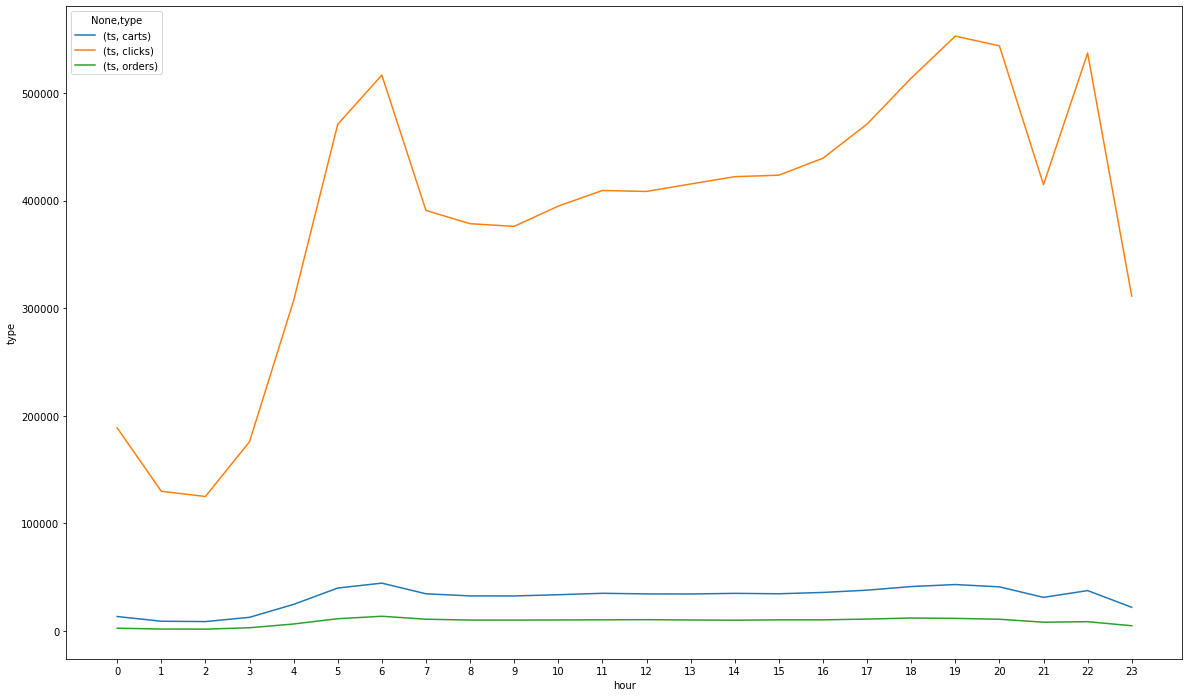

In [12]:
hour_type.plot(xticks=hour_type.index, ylabel='type', figsize=(20, 12))
#시간대별 click, cart, order 양상에는 큰 차이가 없는 것으로 보임
#다만, 시간대별 click 수의 차이는 유의미해보임

- 날짜와 이벤트 유형 간 관계

In [47]:
temp_train = train[['ts', 'type']]
temp_train['date'] = temp_train['ts'].dt.strftime('%m-%d')
temp_train

C:\Users\User\AppData\Local\Temp\ipykernel_11156\238308492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_train['date'] = temp_train['ts'].dt.strftime('%m-%d')


,ts,type,date
0,2022-07-31 22:00:00.025,clicks,07-31
1,2022-07-31 22:01:44.511,clicks,07-31
2,2022-08-01 15:23:59.426,clicks,08-01
3,2022-08-01 15:28:39.997,clicks,08-01
4,2022-08-01 15:31:11.344,clicks,08-01
...,...,...,...
5057903,2022-08-01 06:46:48.967,clicks,08-01
5057904,2022-08-01 06:47:29.078,clicks,08-01
5057905,2022-08-01 06:49:07.035,clicks,08-01
5057906,2022-08-01 06:49:21.116,clicks,08-01


In [48]:
date_type = temp_train.pivot_table(index='date', columns='type', aggfunc=len, fill_value=0)

In [49]:
date_type

ts                
type   carts   clicks orders
date                        
07-31  22963   320632   5517
08-01  97622  1145939  31464
08-02  32910   441340   9636
08-03  31583   413130   9058
08-04  29224   368757   7830
08-05  26321   341676   6613
08-06  22941   305221   5402
08-07  27247   350670   6787
08-08  23356   302878   6286
08-09  32009   335958  12693
08-10  23046   297376   5844
08-11  21685   279606   5774
08-12  20181   268689   5351
08-13  19855   259605   5110
08-14  23736   320797   6122
08-15  21373   283245   6093
08-16  21138   268328   6069
08-17  21813   266557   6075
08-18  19414   242345   5431
08-19  20712   251560   5695
08-20  20522   253378   5386
08-21  23903   289517   7019
08-22  18637   238669   5692
08-23  19385   234951   4742
08-24  19968   230967   5218
08-25  16664   215224   4532
08-26  23489   251874   6835
08-27  23663   256824   6607
08-28  26425   284815   8367

<AxesSubplot:xlabel='date', ylabel='type'>

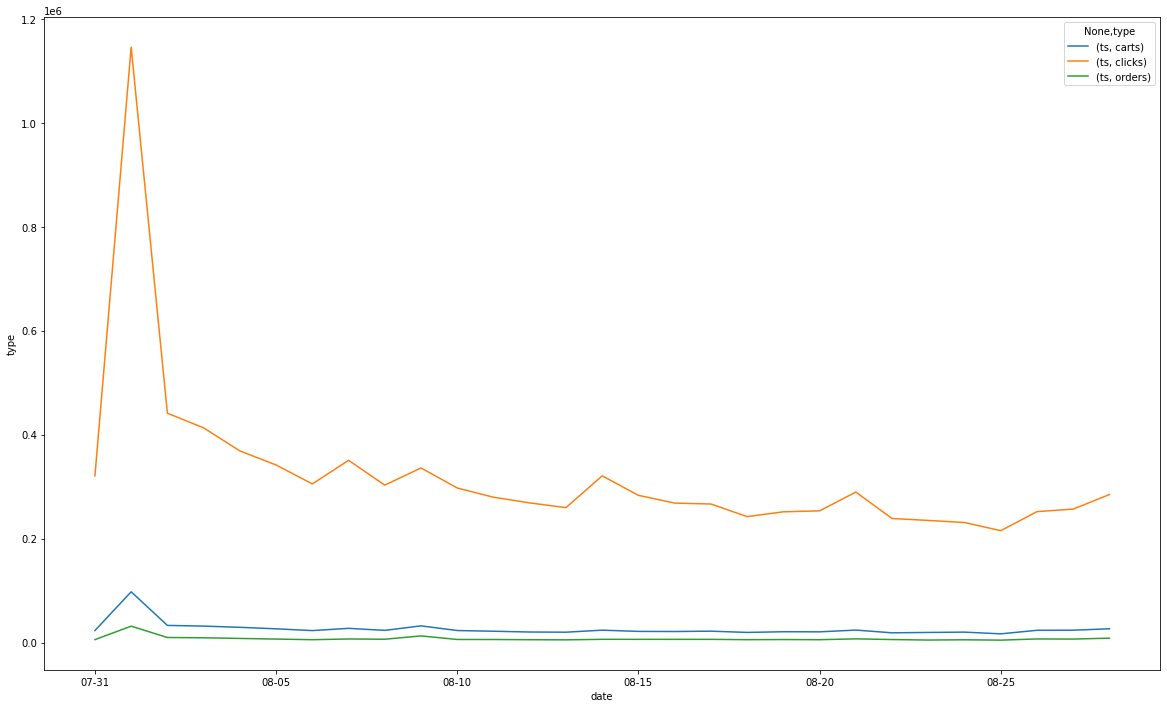

In [52]:
date_type.plot(ylabel='type', figsize=(20, 12)) #특정 행사가 있을 때 활동량이 늘어남

- 요일과 이벤트 유형 간 관계

In [14]:
temp_train = train[['ts', 'type']]
temp_train['dayOfTheWeek'] = temp_train['ts'].dt.dayofweek
dayOfTheWeek = pd.Series({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
temp_train['dayOfTheWeek'] = temp_train['dayOfTheWeek'].map(dayOfTheWeek)
temp_train

C:\Users\User\AppData\Local\Temp\ipykernel_6252\608615058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_train['dayOfTheWeek'] = temp_train['ts'].dt.dayofweek
C:\Users\User\AppData\Local\Temp\ipykernel_6252\608615058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_train['dayOfTheWeek'] = temp_train['dayOfTheWeek'].map(dayOfTheWeek)


,ts,type,dayOfTheWeek
0,2022-07-31 22:00:00.025,clicks,Sunday
1,2022-07-31 22:01:44.511,clicks,Sunday
2,2022-08-01 15:23:59.426,clicks,Monday
3,2022-08-01 15:28:39.997,clicks,Monday
4,2022-08-01 15:31:11.344,clicks,Monday
...,...,...,...
5057903,2022-08-01 06:46:48.967,clicks,Monday
5057904,2022-08-01 06:47:29.078,clicks,Monday
5057905,2022-08-01 06:49:07.035,clicks,Monday
5057906,2022-08-01 06:49:21.116,clicks,Monday


In [22]:
dayOfTheWeek_type = temp_train.pivot_table(index='dayOfTheWeek', columns='type', aggfunc=len, fill_value=0)
dayOfTheWeek_type = dayOfTheWeek_type.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
dayOfTheWeek_type

ts                
type           carts   clicks orders
dayOfTheWeek                        
Monday        160988  1970731  49535
Tuesday       105442  1280577  33140
Wednesday      96410  1208030  26195
Thursday       86987  1105932  23567
Friday         90703  1113799  24494
Saturday       86981  1075028  22505
Sunday        124274  1566431  33812

<AxesSubplot:xlabel='dayOfTheWeek', ylabel='type'>

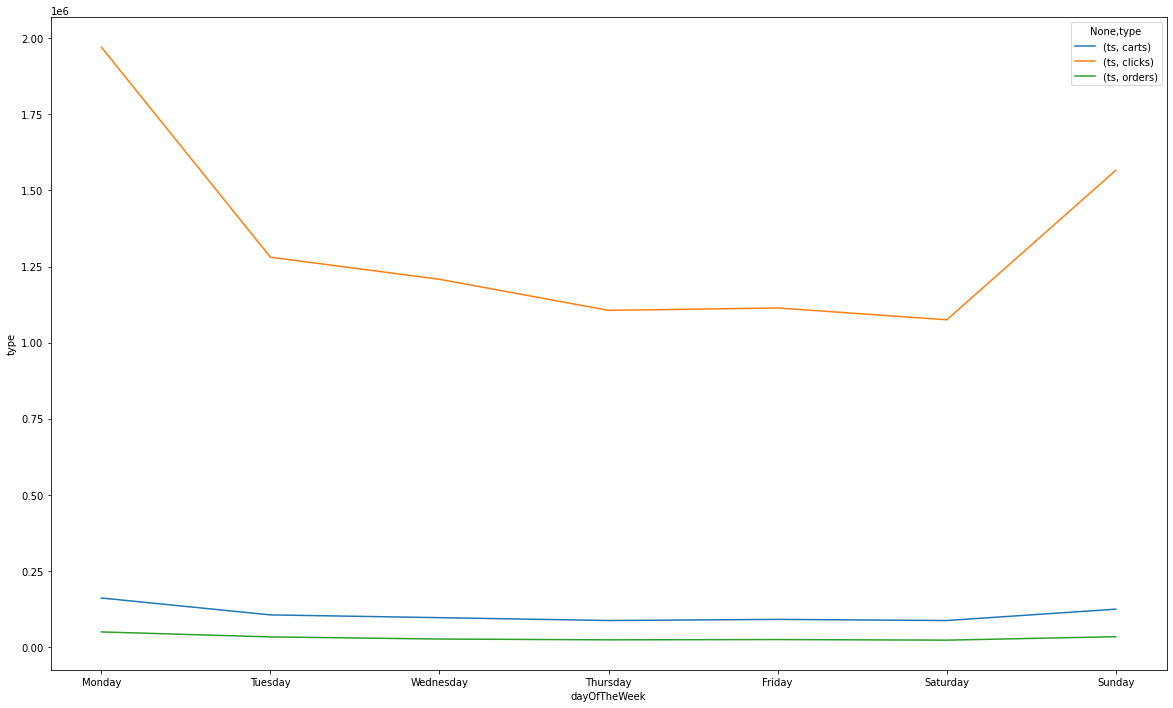

In [23]:
dayOfTheWeek_type.plot(ylabel='type', figsize=(20, 12))
#월요일, 일요일 click수가 다른 요일에 비해 높음
#click 수 증가가 주문량 증가로 이어지지 않음

In [53]:
train

,session,aid,ts,type
0,0,1517085,2022-07-31 22:00:00.025,clicks
1,0,1563459,2022-07-31 22:01:44.511,clicks
2,0,1309446,2022-08-01 15:23:59.426,clicks
3,0,16246,2022-08-01 15:28:39.997,clicks
4,0,1781822,2022-08-01 15:31:11.344,clicks
...,...,...,...,...
5057903,199999,928064,2022-08-01 06:46:48.967,clicks
5057904,199999,849970,2022-08-01 06:47:29.078,clicks
5057905,199999,1052480,2022-08-01 06:49:07.035,clicks
5057906,199999,487255,2022-08-01 06:49:21.116,clicks
